In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA

# load in the dataset
data = pd.read_csv('../../train.csv')
print(data.shape)
data.dropna(
  subset=[
    'stock_id', 
    'date_id', 
    'seconds_in_bucket', 
    'imbalance_size', 
    'imbalance_buy_sell_flag',
    'reference_price',
    'matched_size',
    'far_price',
    'near_price',
    'bid_price',
    'bid_size',
    'ask_price',
    'ask_size',
    'wap',
    'target',
  ], 
  inplace=True
)
print(data.shape)
data

(5237980, 17)
(2343638, 17)


,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
5730,0,0,300,0.00,0,1.000241,26670118.88,1.000241,1.000241,1.000026,19319.31,1.000241,16149.55,1.000143,-10.039806,30,0_300_0
5731,1,0,300,242332.96,-1,1.000073,3242054.27,0.981974,0.994490,0.999544,43205.40,1.000308,2042.76,1.000273,-1.329780,30,0_300_1
5732,2,0,300,0.00,0,1.000193,4671376.00,1.000193,1.000193,0.999035,18971.00,1.001036,59688.26,0.999518,14.009476,30,0_300_2
5733,3,0,300,2914730.16,1,0.999870,41057776.66,1.003870,1.002279,0.999827,25569.50,1.000042,37897.50,0.999914,-4.339814,30,0_300_3
5734,4,0,300,3396923.02,1,0.998496,38356174.88,1.007894,1.007894,0.998357,14446.00,0.998703,2601.18,0.998650,10.850430,30,0_300_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,2440722.89,-1,1.000317,28280361.74,0.999734,0.999734,1.000317,32257.04,1.000434,319862.40,1.000328,2.310276,26454,480_540_195
5237976,196,480,540,349510.47,-1,1.000643,9187699.11,1.000129,1.000386,1.000643,205108.40,1.000900,93393.07,1.000819,-8.220077,26454,480_540_196
5237977,197,480,540,0.00,0,0.995789,12725436.10,0.995789,0.995789,0.995789,16790.66,0.995883,180038.32,0.995797,1.169443,26454,480_540_197
5237978,198,480,540,1000898.84,1,0.999210,94773271.05,0.999210,0.999210,0.998970,125631.72,0.999210,669893.00,0.999008,-1.540184,26454,480_540_198


In [2]:
# scree plot and cumulative variance explained plot
import matplotlib.pyplot as plt
def pca_vizualizations(pca):
  # Variance explained by each component
  variance = pca.explained_variance_ratio_

  # Cumulative variance
  cumulative_variance = np.cumsum(variance)

  # Scree Plot
  plt.figure(figsize=(12, 5))

  plt.subplot(1, 2, 1)
  plt.bar(range(1, len(variance) + 1), variance)
  plt.xlabel('Principal Component')
  plt.ylabel('Variance Explained')
  plt.title('Scree Plot')

  # Cumulative Variance Plot
  plt.subplot(1, 2, 2)
  plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
  plt.xlabel('Number of Components')
  plt.ylabel('Cumulative Variance Explained')
  plt.title('Cumulative Variance Plot')

  plt.tight_layout()
  plt.show()

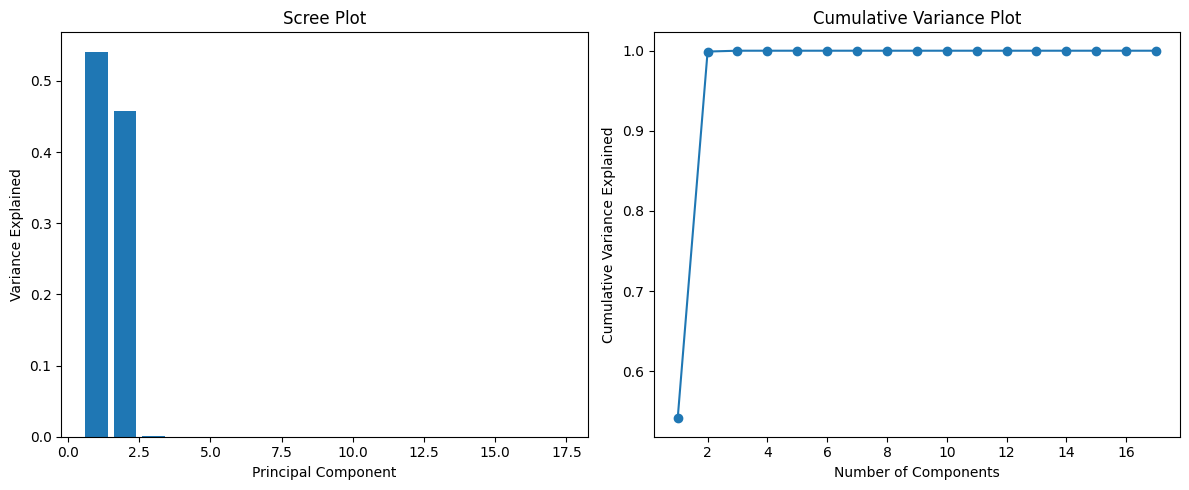

In [3]:
pca = PCA(n_components=data.columns.size)
pca.fit(data)
pca_vizualizations(pca)

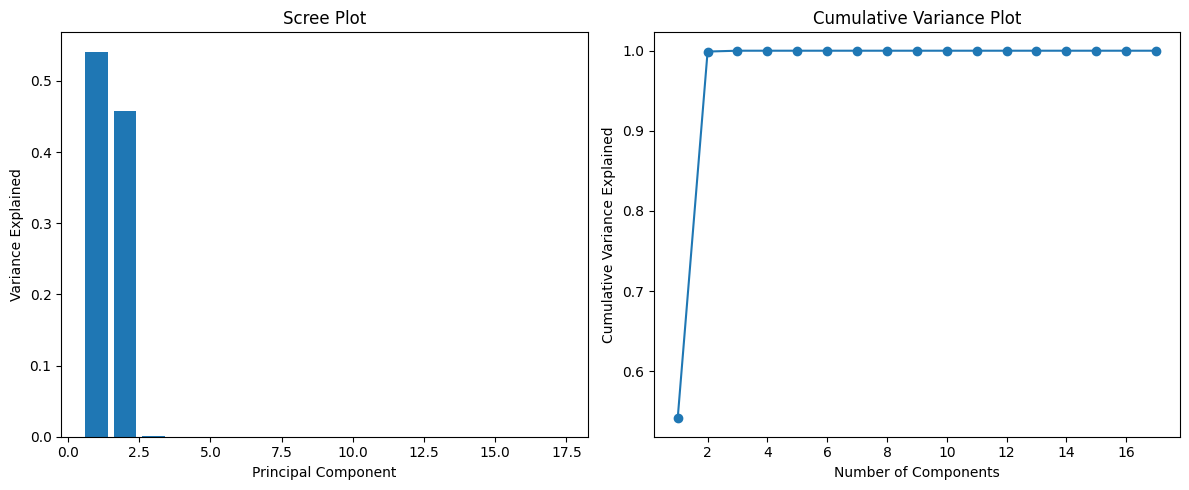

In [4]:
# standardised
pca = PCA(n_components=data.columns.size, whiten=True)
pca.fit(data)
pca_vizualizations(pca)